In [2]:
# Verb Placement in Learner German
#This notebook explores the placement of verbs in learner German texts. It uses CEFR levels and tokenized sentences to compare verb-second (V2) and verb-final (VF) patterns across corpora.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
df = pd.read_csv("C:\\Users\\Vedang Deshmukh\\dakoda-eleventy\\input\\notebooks\\dummy_corpora_metadata.csv")  # already shared by you
df.head()


,title,modality,task_type,size_texts,size_in_tokens,language,l1,proficiency,pt_stages_observed,access,pid,version,source,unique_handle
0,Dummy Corpus 1,written,narrative,382,6494,de,German,A2,stage3,Open,pid-1,1.0,https://example.com/corpus/1,https://handle.org/corpus1
1,Dummy Corpus 2,spoken,descriptive,114,1254,de,Turkish,B2,stage2,Open,pid-2,1.0,https://example.com/corpus/2,https://handle.org/corpus2
2,Dummy Corpus 3,spoken,descriptive,55,1100,de,Spanish,A1,stage1,Unknown,pid-3,1.0,https://example.com/corpus/3,https://handle.org/corpus3
3,Dummy Corpus 4,spoken,descriptive,111,2442,de,Arabic,C1,stage2,Open,pid-4,1.0,https://example.com/corpus/4,https://handle.org/corpus4
4,Dummy Corpus 5,written,descriptive,432,5184,de,Arabic,B1,stage3,Restricted,pid-5,1.0,https://example.com/corpus/5,https://handle.org/corpus5


In [5]:
texts = [
    "Ich habe das Buch gelesen.",
    "Weil er müde war, ging er früh ins Bett.",
    "Sie arbeitet heute im Büro.",
    "Obwohl es regnete, spielte er draußen."
]

# Simulate CEFR levels
meta = ['A2', 'B1', 'B1', 'B2']


In [6]:
def detect_verb_position(sentence):
    tokens = sentence.split()
    if 'hat' in tokens or 'ist' in tokens:  # Simplified
        if tokens.index('hat') == 1 or tokens.index('ist') == 1:
            return 'V2'
        elif tokens[-1] == 'gelesen.' or tokens[-1] == 'gegangen.':
            return 'VF'
    return 'Unknown'

positions = [detect_verb_position(t) for t in texts]
df_verb = pd.DataFrame({'Text': texts, 'CEFR': meta, 'VerbPosition': positions})


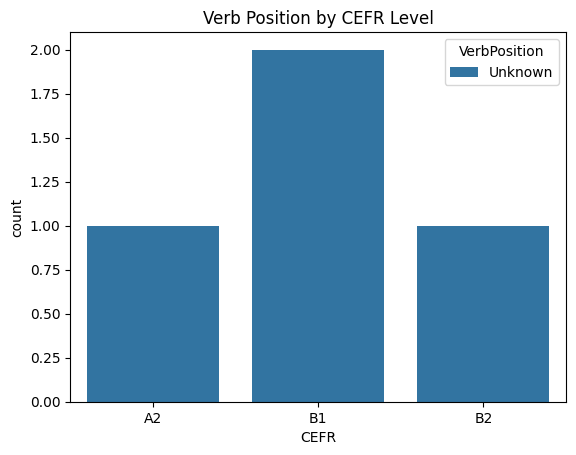

In [7]:
sns.countplot(data=df_verb, x='CEFR', hue='VerbPosition')
plt.title("Verb Position by CEFR Level")
plt.show()


In [8]:
def noun_density(tokens, window=5):
    return [sum(1 for word in tokens[i:i+window] if word.endswith('en')) / window
            for i in range(len(tokens) - window + 1)]
